# CAB420, Practical 1 - Question 1 Template
## Linear Regression

Using the dataset from Problem 1, split the data into training, validation and testing as follows:
* Training: All data from the years 2014-2016
* Validation: All data from 2017
* Training: All data from 2018

Develop a regression model to predict one of the cycleway data series in your dataset. In developing this model you should:
* Initially, use all weather data (temperature, rainfall and solar exposure) and all other data series for a particular counter type (i.e. if you’re predicting cyclists inbound for a counter, use all other cyclist inbound counters)
* Use p-values, qqplots, and performance on the validation set to remove terms and improve the model.

When you have finished refining the model, evaluate it on test set, and compare the Root Mean Squared Error (RMSE) for the training, validation and test sets.

In training the model, you will need to ensure that you have no samples (i.e. rows) with missing data. As such, you should remove samples with missing data from the dataset before training and evaluating the model. This may also mean that you have to remove some columns that contain large amounts of missing data.

### Relevant Examples

The first linear regression example, ``CAB420_Regression_Example_1_Linear_Regression.ipynb`` is a useful starting point here.

### Suggested Packages

The following packages are suggested, however there are many ways to approach things in python, if you'd rather use different pacakges that's cool too.

In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn is another good plotting library. In particular, I like it for heatmaps (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

C:\Users\livin\AppData\Local\Temp\ipykernel_7692\1169477595.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Step 1: Load the data
This may be the data you created in Q1, or the pre-baked merged data.

Use pandas and the read_csv function to load the data. It is suggested you inspect the data after loading (print some of it, use the ``head()`` function, possibly plot some series) as a sanity check.

In [4]:
data = pd.read_csv('combined.csv')
print(data.shape)

(1826, 58)


### Step 2: Filter the data

As you inspect the data, you may see some series have fewer samples than others. Trying to find rows that have all data series may lead to having too little data for analysis. A suggested approach is:
* Remove columns that have too many missin values. Use the ``dropna()`` function while setting ``axis=1`` and a threshold, such that only columns with threshold valid values or more are retained (a suggested value for threshold is about 1500, i.e. if any more than about 300 values are missing, the column should be removed).
* Now, remove the other rows that have missing values. Here, you could use ``dropna()`` operating over the rows (i.e. ``axis=0``).

(1422, 27)
Index(['index', 'Date', 'BicenntenialBikeway',
       'BicentennialBikewayPedestriansInbound',
       'BicentennialBikewayPedestriansOutbound',
       'BicentennialBikewayCyclistsInbound',
       'BicentennialBikewayCyclistsOutbound',
       'NorthBrisbaneBikewayMannParkWindsorPedestrianInbound',
       'NorthBrisbaneBikewayMannParkWindsorPedestrianOutbound',
       'NorthBrisbaneBikewayMannParkWindsorCyclistsInbound',
       'SchulzCanalBridgePedestriansInbound',
       'SchulzCanalBridgePedestriansOutbound',
       'SchulzCanalBridgeCyclistsInbound', 'SchulzCanalBridgeCyclistsOutbound',
       'StoryBridgeEastPedestrianInbound', 'StoryBridgeEastPedestrianOutbound',
       'StoryBridgeEastCyclistsInbound', 'StoryBridgeEastCyclistsOutbound',
       'StoryBridgeWestPedestrianInbound', 'StoryBridgeWestPedestrianOutbound',
       'StoryBridgeWestCyclistsInbound', 'BureauOfMeteorologyStationNumber',
       'RainfallAmount_millimetres_',
       'PeriodOverWhichRainfallWasMeasured

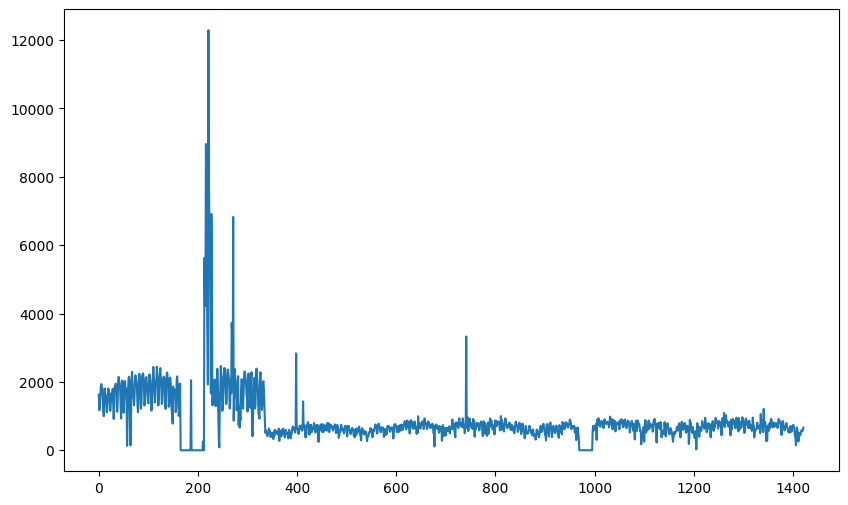

In [11]:
data_filtered = data.dropna(axis=1, thresh=1462).dropna(axis=0).reset_index()
print(data_filtered.shape)
print(data_filtered.columns)

fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1)
ax.plot(data_filtered['BicentennialBikewayPedestriansInbound']) #plot whatever variable here

### Step 3: Split into Train, Validation and Test Splits

You can split the data now. Be sure to check dataset size after splitting to make sure that you have datasets of roughly the size you expect.

As part of this you should also pull out your X and Y data, i.e. your predictors and response.

You could also visualise some of this data, and aspects such as:
* Correlation between predictors and the response
* Correlation between pairs of predictors

In [61]:
from sklearn.model_selection import train_test_split

#0.3 = 30 percent of data and random state ensure the same split each time it is run
train, the_rest = train_test_split(data_filtered, test_size=0.3, random_state = 314) 
val, test = train_test_split(the_rest, test_size=0.5, random_state = 314)

#above code uses original data and gives train 70 percent of it, leaving the other 30 percent to 'the rest'

print(train.shape)
print(val.shape)
print(test.shape)

######### OR #######
#change date to date-time instance
data_filtered['Date']= pd.to_datetime(data_filtered['Date'])

train = data_filtered[data_filtered.Date < datetime(year=2017, month=1, day=1)]
val = data_filtered[((data_filtered.Date >= datetime(year=2017, month=1, day=1)) &
                        (data_filtered.Date < datetime(year=2018, month=1, day=1)))]
test = data_filtered[((data_filtered.Date >= datetime(year=2018, month=1, day=1)) &
                          (data_filtered.Date < datetime(year=2019, month=1, day=1)))]
print('num train = {}'.format(train.shape[0]))
print('val train = {}'.format(val.shape[0]))
print('test train = {}'.format(test.shape[0]))

#### Pull out predictors (x) and response (y) 
# If you don't standardise, then you'll have a non-zero constant which you'll need to learn when you fit the model.
#print(data_filtered.columns)

response = 'BicentennialBikewayCyclistsOutbound'
predictors = ['BicentennialBikewayCyclistsInbound','NorthBrisbaneBikewayMannParkWindsorPedestrianInbound','SchulzCanalBridgePedestriansOutbound',
              'StoryBridgeWestPedestrianInbound','RainfallAmount_millimetres_',
       'MaximumTemperature_DegreeC_',
       'DailyGlobalSolarExposure_MJ_m_m_']

## pull out x and Y by converting to np array

X_train = sm.add_constant(train[predictors].to_numpy())
Y_train = train[response].to_numpy()
print(X_train.shape)
print(Y_train.shape) #one coloum

X_test = sm.add_constant(test[predictors].to_numpy())
Y_test = test[response].to_numpy()

X_val = sm.add_constant(val[predictors].to_numpy())
Y_val = val[response].to_numpy()

(995, 27)
(213, 27)
(214, 27)
num train = 888
val train = 276
test train = 258
(888, 8)
(888,)


### Step 4: Create the Model

Using the X and Y arrays you created above, fit a regression model. 

Explore the outputs you get from the model, including:
* The resultant model, including coefficients, p-values, and $R^2$
* A QQ-Plot, to see if assumptions around residuals hold

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2952.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:34:14   Log-Likelihood:                -5582.9
No. Observations:                 888   AIC:                         1.118e+04
Df Residuals:                     880   BIC:                         1.122e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        310.6527     35.432      8.768      0.0

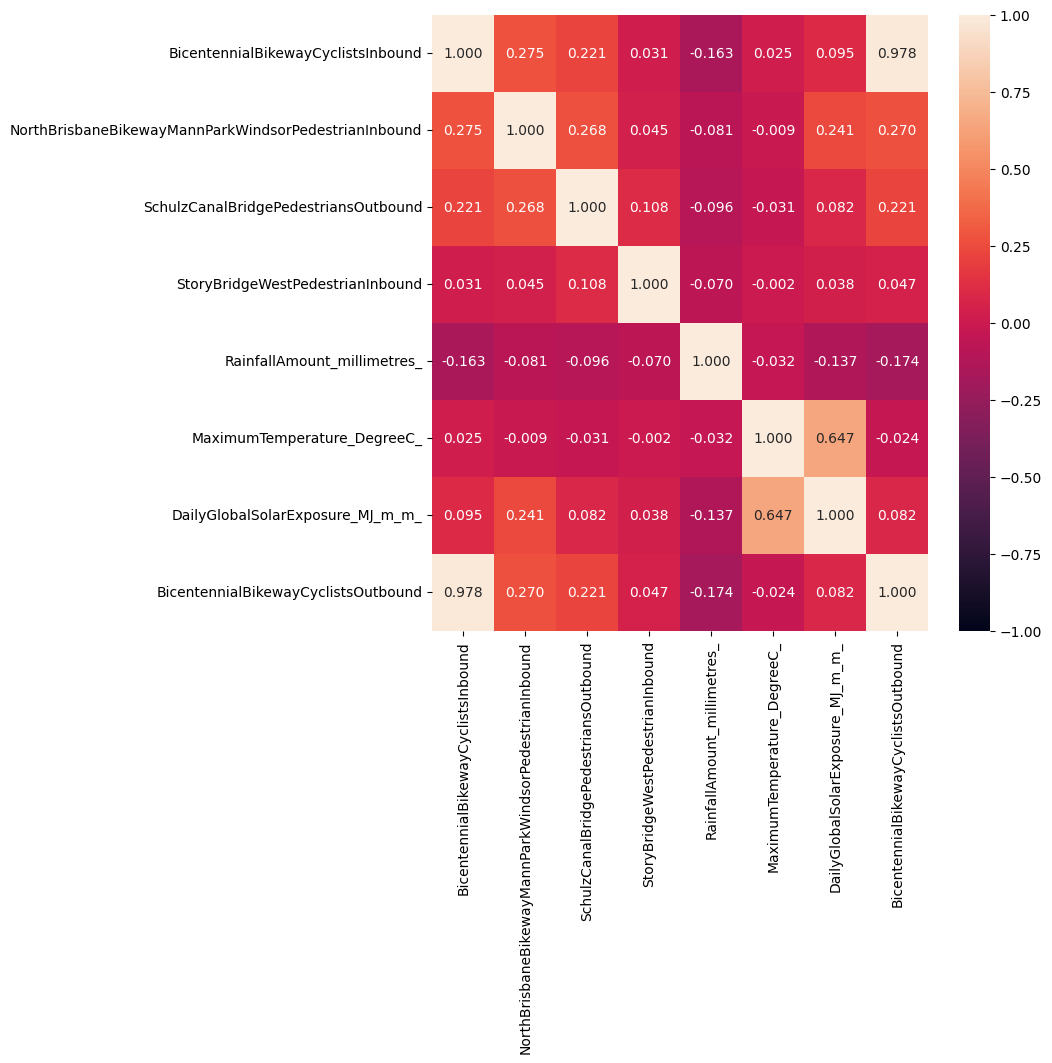

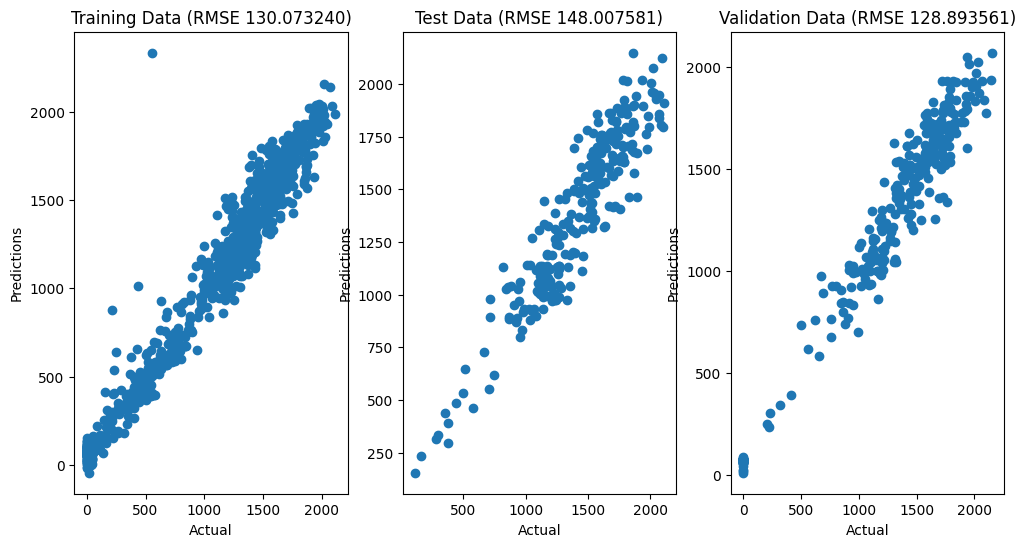

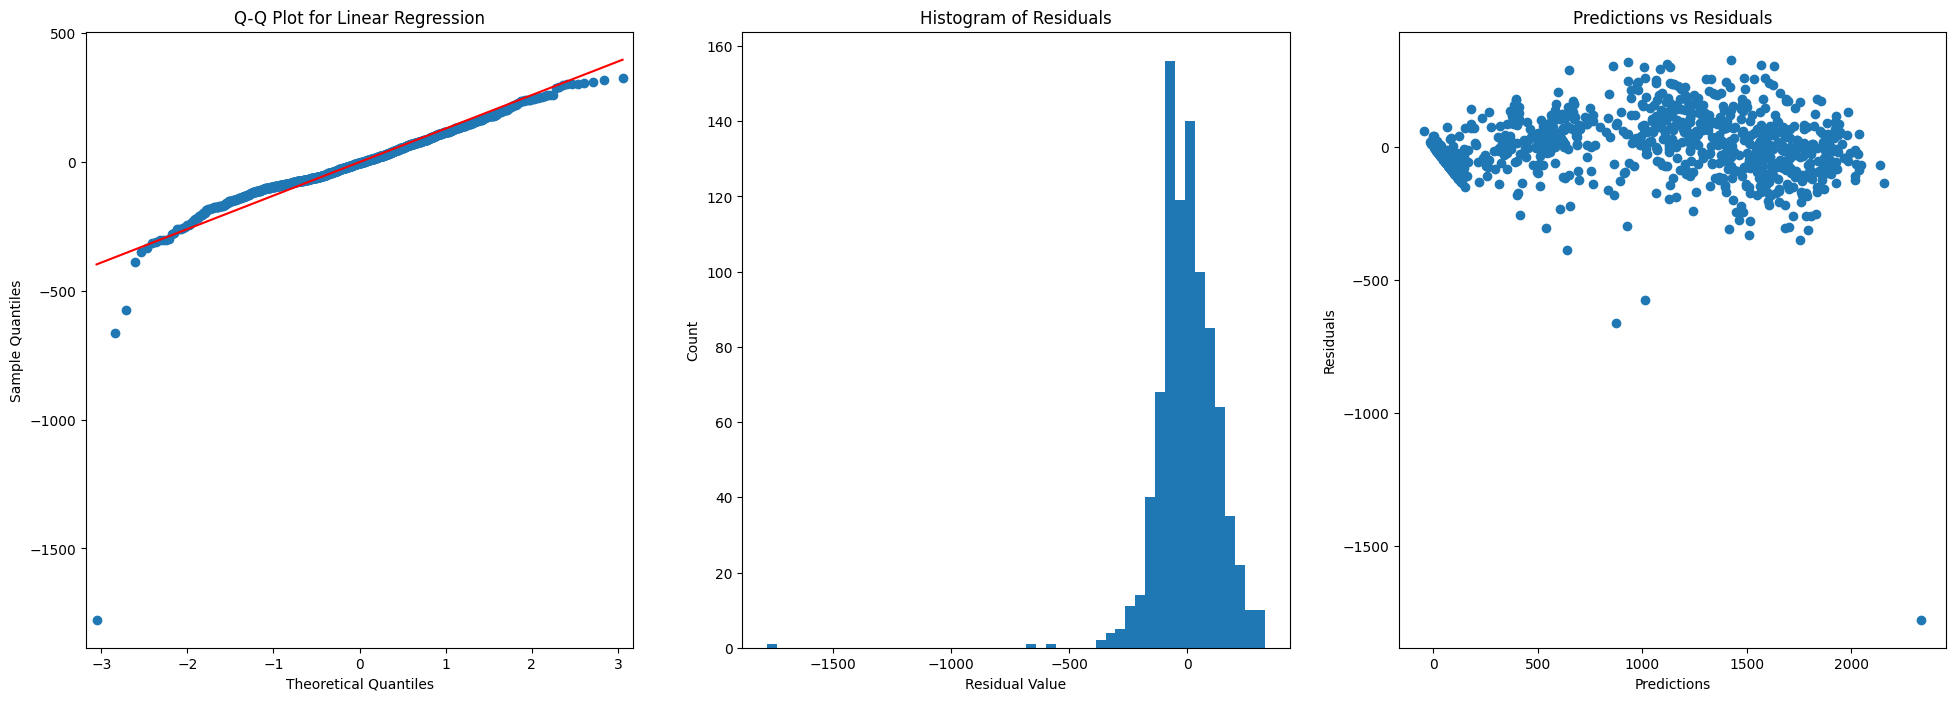

In [60]:
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())
#find correlation between pairs of predictors
all_variables = predictors + ['BicentennialBikewayCyclistsOutbound']
corr_coeffs = train[all_variables].corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr_coeffs, annot=True, fmt="1.3f", vmin=-1.0, vmax=1.0)

#Plot predictions (Scatterplots of rmse). Expect linear trend


### TEST DATA IS ONLY USED ONCE THE MODEL HAS BEEN FINALISED USING TRAINING DATA TO VALIDATE THE MODEL. # DONT SHOW THE PLOT. 
# ONLY 'RECORD' TRAINING. VALIDATION IS USED FOR HYPER PARMS AND TEST IS WHAT IS COMPARED AFTER MODEL IS REFINED 

def plot_predictions(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    #Predictions and errors
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)
    rmse_train = np.sqrt(np.mean((pred_train - Y_train)**2))
    rmse_val = np.sqrt(np.mean((pred_val - Y_val)**2))
    rmse_test = np.sqrt(np.mean((pred_test - Y_test)**2))
    
    fig = plt.figure(figsize=[12,6])
    ax = fig.add_subplot(1,3,1)
    ax.scatter(Y_train, pred_train)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title('Training Data (RMSE %f)' %rmse_train)
    
    ax = fig.add_subplot(1,3,2)
    ax.scatter(Y_test, pred_test)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title('Test Data (RMSE %f)' %rmse_test)
    
    ax = fig.add_subplot(1,3,3)
    ax.scatter(Y_val, pred_val)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title('Validation Data (RMSE %f)' %rmse_val)

plot_predictions(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

#Plotting residuals #TRAINING DATA ONLY
def plot_diagnostics(model, training_data):
    fig = plt.figure(figsize=[24, 8])
    ax = fig.add_subplot(1, 3, 1)
    f = sm.qqplot(model.resid, ax=ax, line='s')
    plt.title('Q-Q Plot for Linear Regression')
    
    ax = fig.add_subplot(1, 3, 2)
    ax.hist(model.resid, 50)
    ax.set_xlabel('Residual Value')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Residuals')    

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(model.predict(training_data), model.resid)
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Residuals')
    ax.set_title('Predictions vs Residuals')

plot_diagnostics(model, X_train)

#as you simplify, expect R2 to go down, train RMSE go up, hopefully val RMSE stays roughly same or even slightly improve
#if it goes up significantly, probably throwing away useful data.. 


### Step 5: Refine the Model, and Evaluate the results

Based on model outputs and other data such as correlation, try to improve the model.

Remove terms that look unhelpful. After a term is removed, evaluate the model on the validation and testing sets.

In [ ]:
#to refine, take note of all RMS values and R2 for the initial model. as you simplify, expect R2 to go down, train RMSE go up, hopefully val RMSE 
# stays roughly same or even slightly improve if it goes up significantly, probably throwing away useful data..

#Good to get rid of if high pvalue and low correlation with response. Just keep a copy of original predictors array and take the variable out 
# of the copied array and re-run the code and take note of the changes in the model without the term removed. Remove terms that with high pvalues
# that dont exhibit colinearity with other variables with high p-values.. So will have inital model - "X" removed, etc 
#after progressively removing terms (dont add already removed terms back). However, 
#correlation between pairs of predictors, can remove these terms. look at high p vsalue terms. It is called colinearity may occur between two variables
# with high p-values. remove the one with highest p value. should expect the pvalue to change when colinearity variable is removed

#You want a simpler model with less terms, if you can remove a bunch of terms without the model changing drastically, it is what you want.


#ASSINGMENT
#any plot that looks at the residuals should be on the training data only.
#You could plot predicted vs actual for either (or both) the training and testing set. Likewise, you could provide RMSEs for both. Performance on the test 
#set will be of most interest when comparing models, but things like R^2 and RMSE on the training set are still probably worth reporting